In [1]:
import numpy as np
from matplotlib import pyplot as plt
from manim import *

In [36]:
def func(x: np.ndarray):
    return np.cos(x) + np.sin(2*np.pi*x)

def euler(x: np.ndarray):
    y = np.exp(x * 1j)
    return y.real, y.imag


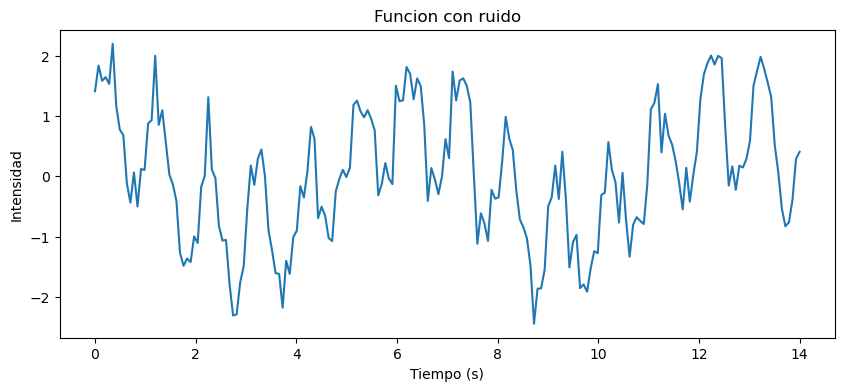

In [107]:
n = 200
time = 14
X = np.linspace(0, time, n)
Y_real = func(X)
Y = Y_real + 0.35 * np.random.normal(0, 1, n)

X_euler, Y_euler = euler(X)

_, ax = plt.subplots(1,1, figsize=(10, 4))
ax.plot(X, Y);
ax.set_ylabel("Intensidad")
ax.set_xlabel("Tiempo (s)")
ax.set_title("Funcion con ruido");

In [121]:
fft = np.fft.rfft(Y) / n
freq = np.fft.rfftfreq(n, X[1] - X[0])

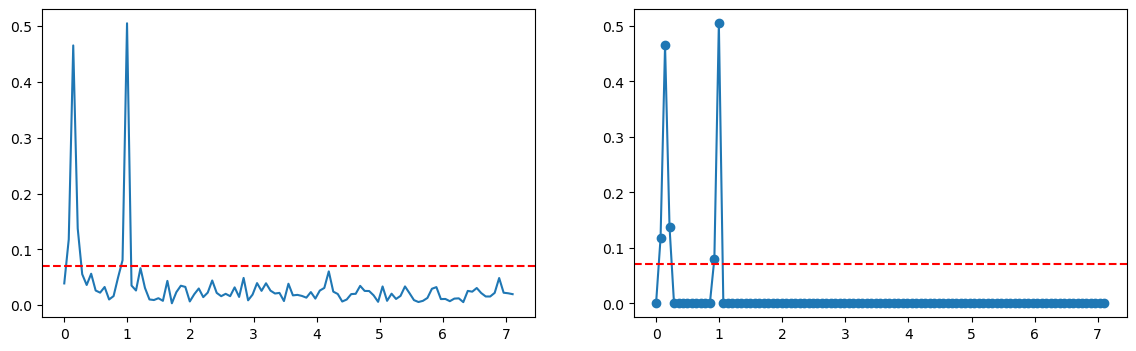

In [122]:
umbral = 0.07
fft_filtrado = fft * (np.abs(fft) > umbral)

_, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].plot(freq, np.abs(fft));
ax[0].axhline(umbral, color="red", linestyle="--");

ax[1].scatter(freq, np.abs(fft_filtrado));
ax[1].plot(freq, np.abs(fft_filtrado));
ax[1].axhline(umbral, color="red", linestyle="--");

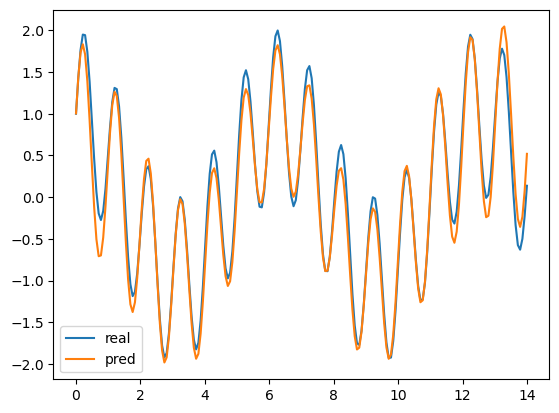

In [123]:
funciones = []
for f, c in zip(freq, fft_filtrado):
    a = 2 * c.real
    b = -2 * c.imag

    comp = a * np.cos(2*np.pi * f * X) + b * np.sin(2*np.pi * f * X)
    funciones.append(comp)

Y_PRED = np.sum(funciones, axis=0)

plt.plot(X, Y_real, label="real")
plt.plot(X, Y_PRED, label="pred");
plt.legend();

1 
2 Real
3 
13 
14 Real


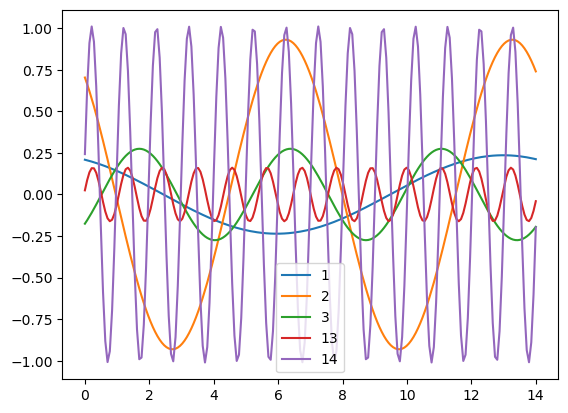

In [165]:
for i, f in enumerate(funciones):
    if np.abs(fft_filtrado[i]) > 0.0:
        print(i, end=" ")
        if np.abs(fft_filtrado[i]) > 0.3:
            print("Real")
        else:
            print("")
        plt.plot(X, f, label=f"{i}")

plt.legend();
    

In [190]:
%%manim -pql -v WARNING Descomposicion

class Descomposicion(Scene):
    def construct(self):
        self.show_axis()
        self.wait()
        self.show_data()
        self.wait()
        self.animate()
        self.wait()
    
    def show_axis(self):
        self.ax = Axes(
            x_range=[0, 14, 1],
            y_range=[-2, 2, 1],
            tips=False
        )
        self.ax.move_to(LEFT*4).scale(0.4)
        self.play(Create(self.ax))
    
    def show_data(self):
        self.graph = self.ax.plot_line_graph(X, Y, add_vertex_dots=False)
        self.play(Write(self.graph))
    
    def animate(self):
        grupo = Group()
        g1 = self.ax.plot_line_graph(X, funciones[1], add_vertex_dots=False)
        g1.color = RED
        self.play(g1.animate.move_to(RIGHT * 2 + UP * 3))
        grupo.add(g1)
        
        g2 = self.ax.plot_line_graph(X, funciones[2], add_vertex_dots=False)
        g2.color = BLUE
        self.play(g2.animate.move_to(RIGHT * 2 + UP * 1.5))
        grupo.add(g2)
        
        g3 = self.ax.plot_line_graph(X, funciones[3], add_vertex_dots=False)
        g3.color = GREEN
        self.play(g3.animate.move_to(RIGHT * 2))
        grupo.add(g3)
        
        g4 = self.ax.plot_line_graph(X, funciones[13], add_vertex_dots=False)
        g4.color = PURPLE
        self.play(g4.animate.move_to(RIGHT * 2 + DOWN * 1.5))
        grupo.add(g4)
        
        g5 = self.ax.plot_line_graph(X, funciones[14], add_vertex_dots=False)
        g5.color = ORANGE
        self.play(g5.animate.move_to(RIGHT * 2 + DOWN * 3))
        grupo.add(g5)
        
        self.wait()
        self.play(FadeOut(self.ax), FadeOut(self.graph), grupo.animate.move_to(LEFT * 4))
        self.wait()
        
        graph = self.ax.plot_line_graph(X, Y_PRED, add_vertex_dots=False)
        graph.move_to(RIGHT*4)
        self.play(FadeIn(graph), Transform(grupo, graph))
        self.play(graph.animate.move_to(RIGHT + LEFT))

Manim Community v0.19.0